In [1]:
import osmnx as ox
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt


place_coord = (43.94593458427975, -78.89566960105887) # Ontario Tech University
radius = 1000  # meters
#get the location graph
graph = ox.graph_from_point(place_coord, dist=radius)#, network_type="drive")
origin = ox.nearest_nodes(graph, X=place_coord[0],Y=place_coord[1])

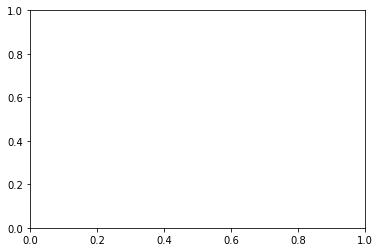

In [98]:
start_point = (43.94593458427975, -78.89566960105887)

{'y': 43.949039, 'x': -78.8857903, 'street_count': 3}

In [2]:
# # Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
nodes

,y,x,street_count,highway,geometry
osmid,,,,,
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017)
278589617,43.949039,-78.885790,3,NaN,POINT (-78.88579 43.94904)
278589715,43.941628,-78.886956,3,NaN,POINT (-78.88696 43.94163)
278589716,43.941917,-78.886902,3,NaN,POINT (-78.88690 43.94192)
287484083,43.948079,-78.896023,4,traffic_signals,POINT (-78.89602 43.94808)
...,...,...,...,...,...
9416596527,43.942683,-78.887589,3,NaN,POINT (-78.88759 43.94268)
9421107717,43.946317,-78.897839,4,NaN,POINT (-78.89784 43.94632)
9421107718,43.944526,-78.898634,4,NaN,POINT (-78.89863 43.94453)


In [11]:
edges

osmid   highway   access  oneway   length  \
u          v          key                                                  
278589616  1400085309 0     25559763      path  private   False    6.647   
           1807800482 0    118114903  tertiary      NaN   False    9.674   
           321928540  0    118114903  tertiary      NaN   False   34.006   
278589617  1400085309 0     25559763      path  private   False  119.542   
           1370670573 0    122734522   service  private   False  176.978   
...                              ...       ...      ...     ...      ...   
9421107719 7693073054 0    466443706   footway      NaN   False   36.887   
9421107720 4597838183 0    271653479   footway      NaN   False    8.683   
           4272234815 0    428025043   footway      NaN   False   23.908   
           7693073053 0    271653479   footway      NaN   False   27.193   
           2360909771 0    428025043   footway      NaN   False   27.283   

                                       name maxspeed  \
u          v          key                              
278589616  1400085309 0                 NaN      NaN   
           1807800482 0    Conlin Road East       50   
           321928540  0    Conlin Road East       50   
278589617  1400085309 0                 NaN      NaN   
           1370670573 0                 NaN      NaN   
...                                     ...      ...   
9421107719 7693073054 0                 NaN      NaN   
9421107720 4597838183 0                 NaN      NaN   
           4272234815 0                 NaN      NaN   
           7693073053 0                 NaN      NaN   
           2360909771 0                 NaN      NaN   

                                                                    geometry  \
u          v          key                                                      
278589616  1400085309 0    LINESTRING (-78.88587 43.95017, -78.88585 43.9...   
           1807800482 0    LINESTRING (-78.88587 43.95017, -78.88599 43.9...   
           321928540  0    LINESTRING (-78.88587 43.95017, -78.88547 43.9...   
278589617  1400085309 0    LINESTRING (-78.88579 43.94904, -78.88578 43.9...   
           1370670573 0    LINESTRING (-78.88579 43.94904, -78.88556 43.9...   
...                                                                      ...   
9421107719 7693073054 0    LINESTRING (-78.89547 43.94461, -78.89549 43.9...   
9421107720 4597838183 0    LINESTRING (-78.89797 43.94351, -78.89800 43.9...   
           4272234815 0    LINESTRING (-78.89797 43.94351, -78.89826 43.9...   
           7693073053 0    LINESTRING (-78.89797 43.94351, -78.89796 43.9...   
           2360909771 0    LINESTRING (-78.89797 43.94351, -78.89792 43.9...   

                          lanes  ref service junction bridge width  \
u          v          key                                            
278589616  1400085309 0     NaN  NaN     NaN      NaN    NaN   NaN   
           1807800482 0     NaN  NaN     NaN      NaN    NaN   NaN   
           321928540  0     NaN  NaN     NaN      NaN    NaN   NaN   
278589617  1400085309 0     NaN  NaN     NaN      NaN    NaN   NaN   
           1370670573 0     NaN  NaN     NaN      NaN    NaN   NaN   
...                         ...  ...     ...      ...    ...   ...   
9421107719 7693073054 0     NaN  NaN     NaN      NaN    NaN   NaN   
9421107720 4597838183 0     NaN  NaN     NaN      NaN    NaN   NaN   
           4272234815 0     NaN  NaN     NaN      NaN    NaN   NaN   
           7693073053 0     NaN  NaN     NaN      NaN    NaN   NaN   
           2360909771 0     NaN  NaN     NaN      NaN    NaN   NaN   

                           road_condition  
u          v          key                  
278589616  1400085309 0                 1  
           1807800482 0                 1  
           321928540  0                 1  
278589617  1400085309 0                 1  
           1370670573 0                 1  
...                                   ...  
942110771

In [47]:
stats = ox.basic_stats(graph)
stats

{'n': 818,
 'm': 2293,
 'k_avg': 5.606356968215159,
 'edge_length_total': 126256.53700000036,
 'edge_length_avg': 55.06172568687325,
 'streets_per_node_avg': 3.0733496332518335,
 'streets_per_node_counts': {0: 0, 1: 85, 2: 1, 3: 509, 4: 216, 5: 6, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1039119804400978,
  2: 0.0012224938875305623,
  3: 0.6222493887530562,
  4: 0.26405867970660146,
  5: 0.007334963325183374,
  6: 0.0012224938875305623},
 'intersection_count': 733,
 'street_length_total': 66559.57399999994,
 'street_segment_count': 1239,
 'street_length_avg': 53.72039870863595,
 'circuity_avg': 1.1504422337217146,
 'self_loop_proportion': 0.00645682001614205}

In [18]:
edges.keys()

Index(['osmid', 'highway', 'access', 'oneway', 'length', 'name', 'maxspeed',
       'geometry', 'lanes', 'ref', 'service', 'junction', 'bridge', 'width',
       'road_condition'],
      dtype='object')

In [42]:
k = 'lanes'
mylist=list(edges[k].values)
unique = [x for i, x in enumerate(mylist) if i == mylist.index(x)]

print(f'\n {k} = {unique}')


 lanes = [nan, '4', '2', '1', ['6', '2'], ['2', '3'], '3', ['1', '2'], '6', ['3', '4'], ['2', '4']]


<AxesSubplot:>

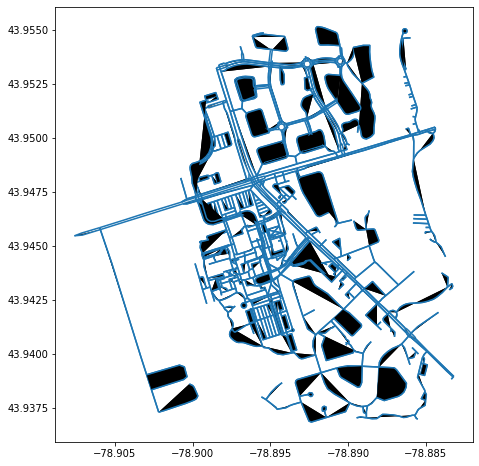

In [43]:
# Plot the nodes
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
routes=edges[edges['lanes']!='nan']
routes.plot(ax=ax, facecolor='black')


In [92]:
G = nx.path_graph(3)
labels = []
nx.set_node_attributes(G, labels, "labels")
labels.append("foo")
G.nodes[0]["labels"]

G.nodes[1]["labels"]

G.nodes[2]["labels"]

['foo']

In [53]:
import networkx as nx
orig, dest = np.random.choice(graph.nodes(), 2)
route = nx.shortest_path(graph, orig, dest, weight='length')

In [63]:
nodes

,y,x,street_count,highway,geometry
osmid,,,,,
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017)
278589617,43.949039,-78.885790,3,NaN,POINT (-78.88579 43.94904)
278589715,43.941628,-78.886956,3,NaN,POINT (-78.88696 43.94163)
278589716,43.941917,-78.886902,3,NaN,POINT (-78.88690 43.94192)
287484083,43.948079,-78.896023,4,traffic_signals,POINT (-78.89602 43.94808)
...,...,...,...,...,...
9416596527,43.942683,-78.887589,3,NaN,POINT (-78.88759 43.94268)
9421107717,43.946317,-78.897839,4,NaN,POINT (-78.89784 43.94632)
9421107718,43.944526,-78.898634,4,NaN,POINT (-78.89863 43.94453)


In [69]:
nodes['road_matric'][0]=2
nodes.iloc[nodes.index==278589616]

/home/abdo2020/anaconda3/envs/hais-node-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,y,x,street_count,highway,geometry,road_matric
osmid,,,,,,
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017),0


In [82]:
nodes.iloc[nodes.index==278589616]['road_matric'].values

array([0])

In [89]:
nodes['road_matric']

osmid
278589616     0
278589617     0
278589715     0
278589716     0
287484083     0
             ..
9416596527    0
9421107717    0
9421107718    0
9421107719    0
9421107720    0
Name: road_matric, Length: 818, dtype: int64

In [88]:
nodes['road_matric'][1]=7

/home/abdo2020/anaconda3/envs/hais-node-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
len(route)

46

In [54]:
route.keys()

[4597750946,
 4597750950,
 278589617,
 1400085309,
 1400085332,
 1803287063,
 8177143859,
 8177143858,
 4597851324,
 4597851294,
 1789086048,
 4597851332,
 6832852100,
 9136453835,
 9136453836,
 9136453837,
 4936219168,
 7655449517,
 1076440598,
 4614579327,
 4614579325,
 4614579323,
 4085783095,
 8392479442,
 8392479438,
 8392479439,
 8392479435,
 8392479445,
 1076440631,
 4612404857,
 4612404860,
 4612387175,
 9421107719,
 7693073054,
 4612387180,
 2765877998,
 4271804313,
 4271804311,
 4271804315,
 4271804316,
 2765890161,
 2765890159,
 2360909848,
 2360909994,
 2360921659,
 5362737151]

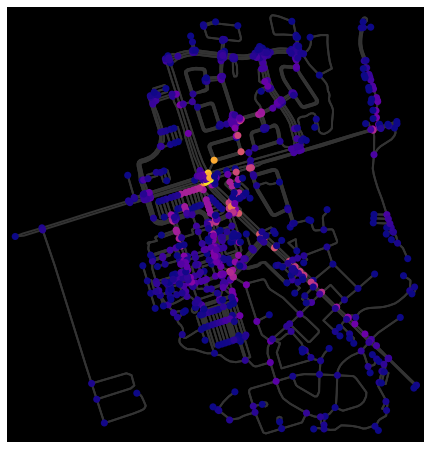

/home/abdo2020/anaconda3/envs/hais-node-env/lib/python3.7/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/home/abdo2020/anaconda3/envs/hais-node-env/lib/python3.7/site-packages/osmnx/io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [93]:
G=graph
# impute edge (driving) speeds and calculate edge traversal times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# you can convert MultiDiGraph to/from geopandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
G = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

# convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
# choose between parallel edges by minimizing travel_time attribute value
D = ox.utils_graph.get_digraph(G, weight="travel_time")

# calculate node betweenness centrality, weighted by travel time
bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
nx.set_node_attributes(G, values=bc, name="bc")

# plot the graph, coloring nodes by betweenness centrality
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, filepath="./tmp/graph_shapefile/")
ox.save_graph_geopackage(G, filepath="./tmp/graph.gp")